In [1]:
import os
import sys
package = os.path.abspath("../../")
sys.path.insert(0, package)
from src.data.config import load_config_from_yaml
from src.data.dataset import ImageDataset, loader
from matplotlib import pyplot as plt
import numpy as np

/home/lilong/.local/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [2]:
config_file='../../configs/example_fluxkontext_fp16.yaml'
config_file = os.path.abspath(config_file)
config = load_config_from_yaml(config_file)


In [3]:
config

Config(trainer=<TrainerKind.FluxKontext: 'FluxKontext'>, resume=None, mode=<TrMode.predict: 'predict'>, model=ModelConfig(pretrained_model_name_or_path='black-forest-labs/FLUX.1-Kontext-dev', lora=LoraConfig(r=16, lora_alpha=16, init_lora_weights='gaussian', target_modules=['to_k', 'to_q', 'to_v', 'to_out.0'], pretrained_weight=None, adapter_name='lora_edit'), quantize=True), data=DataConfig(class_path='src.data.dataset.ImageDataset', init_args=DatasetInitArgs(dataset_path=[{'split': 'train', 'repo_id': 'TsienDragon/face_segmentation_20'}], caption_dropout_rate=0.1, prompt_image_dropout_rate=0.1, cache_dir='/tmp/image_edit_lora/cache', use_cache=True, use_edit_mask=True, selected_control_indexes=[1], prompt_empty_drop_keys=['prompt_embed', 'pooled_prompt_embed'], processor=ImageProcessorConfig(class_path='src.data.preprocess.ImageProcessor', init_args=ImageProcessorInitArgs(process_type='center_crop', resize_mode='bilinear', target_size=[832, 576], controls_size=[[832, 576]]))), batch_

In [4]:
data_init_args = config.data.init_args
dataset = ImageDataset(data_init_args)

缓存已启用，缓存目录: /tmp/image_edit_lora/cache


In [5]:
data_init_args.use_cache

True

In [6]:
data = dataset[0]

In [7]:
data['control'].shape

torch.Size([3, 832, 576])

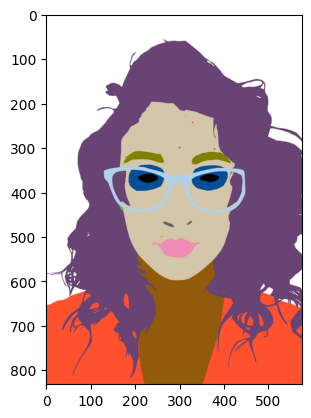

In [8]:
plt.imshow((data['image']*255).numpy().astype(np.uint8).transpose(1, 2, 0))


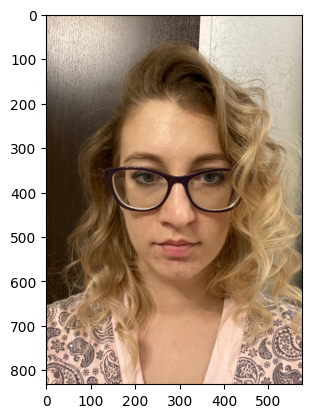

In [9]:
plt.imshow((data['control']*255).numpy().astype(np.uint8).transpose(1, 2, 0))


In [10]:
data['cached']

False

In [11]:
data['prompt']

'change the image from the face to the face segmentation mask'

In [13]:
dataloader = loader(
        class_path=config.data.class_path,
        init_args=config.data.init_args,
        batch_size=config.data.batch_size,
        num_workers=config.data.num_workers,
        shuffle=config.data.shuffle
    )

缓存已启用，缓存目录: /tmp/image_edit_lora/cache


In [14]:
for batch in dataloader:
    break

In [15]:
batch['image'].shape, batch['control'].shape, batch['prompt']


(torch.Size([8, 3, 832, 576]),
 torch.Size([8, 3, 832, 576]),
 ['change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask'])

In [16]:
batch['file_hashes']

{'image_hash': ['e9c716b85125fc46',
  'b48fc38f3cb062a3',
  'adf052cbdc6e2072',
  'bdb0d2cf8b3c8c50',
  'bdad70b6b0703c92',
  'f09e439cc638a753',
  'abd8e3858f6cb490',
  'bdd0c2cd0fae302b'],
 'control_hash': ['e9e69eb8612d6446',
  '98a4a3cb5c2c726f',
  'fdd2028fb22e2953',
  'bd80c22fd22cd9f8',
  'bfed3c32607ca403',
  'cf6bb0418b464cb7',
  'eef8732586267494',
  '9df250cf0e3c303b'],
 'prompt_hash': ['0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5'],
 'empty_prompt_hash': ['a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e482

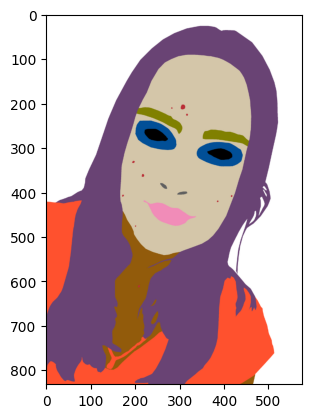

In [29]:
image = batch['image'][6]
image = image.numpy().transpose(1, 2, 0)
image = image*255
image = image.astype(np.uint8)
image.shape
plt.imshow(image)
plt.show()


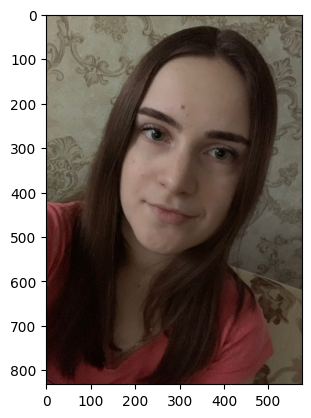

In [30]:
image = batch['control'][6]
image = image.numpy().transpose(1, 2, 0)
image = image*255
image = image.astype(np.uint8)
image.shape
plt.imshow(image)
plt.show()